<a href="https://colab.research.google.com/github/JesperHLund/Autherization-test/blob/main/Random_Forest_GridSearch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest trained on the MNIST dataset**

# Image classification using the MNIST dataset
We will train and evaluate an MLP on the MNIST dataset. It consists of 70.000 grayscale images of handwritten digits (28x28 pixels), and there are 10 classes (one for each digit).

## Setup

In [ ]:
# Common imports
import sklearn
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Import the SSL module and configure certificate verification to be optional to avoid SSLCertVerificationError.
import ssl
ssl.SSLContext.verify_mode = ssl.VerifyMode.CERT_OPTIONAL

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Load the data

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

/Users/hk/miniconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
X.shape

(70000, 784)

<function matplotlib.pyplot.show(close=None, block=None)>

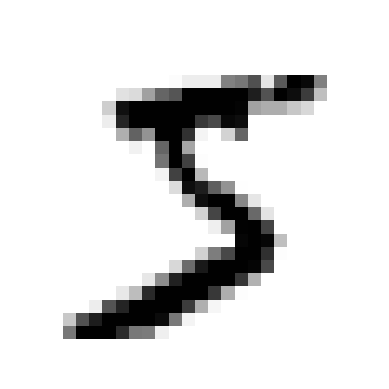

In [ ]:
some_digit = X[0]
some_image = some_digit.reshape(28,28)
plt.imshow(some_image, cmap="binary")
plt.axis("off")
plt.show

In [ ]:
y[0]

'5'

In [ ]:
# Split the dataset in training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train and fine-tune a RandomForestClassifier (this will take many minutes)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': [40, 70],'n_estimators': [600, 1000]}

grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, n_jobs=-1, cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [40, 70], 'n_estimators': [600, 1000]})

In [ ]:
# Show the best estimator
grid_search_cv.best_estimator_

RandomForestClassifier(max_depth=40, n_estimators=600, random_state=42)

In [ ]:
# Evaluate
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.9694285714285714